# KNN Classification

In [81]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [82]:
# simulate data
X, y = make_blobs(
    n_samples=100,
    centers=3,
    n_features=2,
    cluster_std=3.75,
    random_state=42,
)

In [83]:
# check data shape
# note that X is 2d
# y is 1d
# but they compatible number of samples
X.shape, y.shape

((100, 2), (100,))

In [84]:
# take a look at X
X

array([[-10.05510363, -12.56078669],
       [  7.6905684 ,  -2.6425715 ],
       [ -4.26972657,  11.04888629],
       [  9.9003575 ,  -3.2837718 ],
       [ -5.53792459,  -4.77716762],
       [  0.92536762,  -0.1504468 ],
       [ -1.26695976,  12.67258035],
       [  3.81610926,   3.31234183],
       [  5.00391965,   5.6055884 ],
       [ -6.82542354,  10.4231537 ],
       [ -4.55063284,   9.43024584],
       [ -6.02665244,  -1.97832426],
       [ -4.92234632,  -5.76641707],
       [ -6.65795378,   4.52851129],
       [  0.26005205,   9.65691718],
       [-10.89547406,  -5.07083804],
       [ -5.84203669,  -3.77817241],
       [ -2.77923558,  12.7775345 ],
       [-10.19409258,  -6.30364045],
       [ -5.1049861 ,  -7.15321802],
       [ -4.24701397,   7.26779955],
       [ -7.1687586 ,  -5.60078969],
       [ -8.55405826,  -3.66861411],
       [ -1.1539641 ,  14.78192325],
       [ -2.64354527,  14.88169984],
       [ -4.23659301,  12.97849448],
       [ -0.66776145,   0.39574972],
 

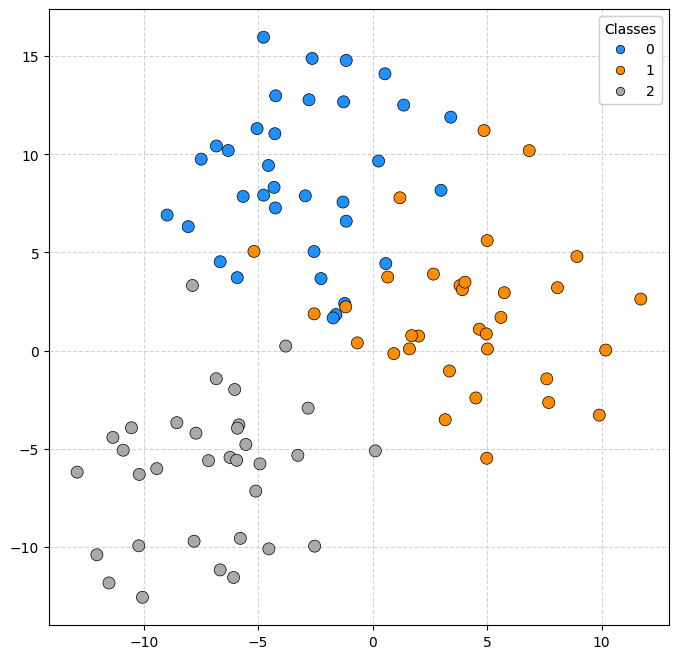

In [85]:
# initialize plot
fig, ax = plt.subplots(figsize=(8, 8))

# add points as a scatter plot
scatter = ax.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    s=75,
    edgecolor="black",
    linewidths=0.5,
    cmap=ListedColormap(["dodgerblue", "darkorange", "darkgrey"]),
)

# add legend
legend = ax.legend(
    *scatter.legend_elements(markeredgecolor="black", markeredgewidth=0.5),
    loc="upper right",
    title="Classes"
)
ax.add_artist(legend)

# add grid
ax.grid(True, linestyle="--", color="lightgrey")
ax.set_axisbelow(True)  # put grid behind the points

# show plot
plt.show()

In [86]:
# take a look at y
# note the three potential classes: 0, 1, 2
y

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

In [87]:
# train-test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [88]:
# check the shapes of the data after splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [89]:
# create knn model using k=7
knn07 = KNeighborsClassifier(n_neighbors=7)

In [90]:
# fit the knn model to the train data
knn07.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [91]:
# get the conditional probability estimates for the first test sample
# the columns represent the three potential classes, in order: 0, 1, 2
knn07.predict_proba([X_test[0]])

array([[0.        , 0.71428571, 0.28571429]])

In [92]:
# get the conditional probability estimates for the full test data
# each row represents a sample from the test data
knn07.predict_proba(X_test)

array([[0.        , 0.71428571, 0.28571429],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.57142857, 0.42857143, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.85714286, 0.14285714, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.57142857, 0.42857143, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ]])

In [93]:
# get classification for first test sample
knn07.predict([X_test[0]])

array([1])

In [94]:
# get classifications for all test samples
knn07.predict(X_test)

array([1, 2, 1, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1])

In [95]:
# calculate test accuracy
accuracy_score(y_test, knn07.predict(X_test))

0.9

Modify this code! Break it! See what changes! Try different values of $k$!